# Vergleich checkouts der Verlage Macmillan und Hachette in 2020

In [2]:
import urllib.request
import pandas as pd

In [3]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2020&$limit=10000"
checkout_file = "checkout.csv"
urllib.request.urlretrieve(url, checkout_file)

('checkout.csv', <http.client.HTTPMessage at 0x7f5cdfaff820>)

In [4]:
checkouts_df = pd.read_csv(checkout_file)

In [5]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2020,8,1,Harvest / Sam Inglis.,"Inglis, Sam",Young Neil 1945 Harvest,"Continuum,",2003.
1,Digital,OverDrive,EBOOK,2020,8,1,The Race Beat,Gene Roberts,"History, Nonfiction, Politics, Sociology","Random House, Inc.",2008
2,Digital,OverDrive,EBOOK,2020,8,5,I Can Cook Vegan,Isa Chandra Moskowitz,"Cooking & Food, Nonfiction",ABRAMS,2019
3,Digital,OverDrive,EBOOK,2020,8,1,Follow the Stars Home,Luanne Rice,"Fiction, Romance","Random House, Inc.",2012
4,Digital,OverDrive,EBOOK,2020,8,1,Blood of Innocence,Tami Dane,"Fantasy, Fiction, Romance",Lightning Source Inc,2012
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2020,1,1,A rebel heart / Beth White.,"White, Beth, 1957-","Man woman relationships Fiction, Women plantat...","Revell, a division of Baker Publishing Group,",[2018]
9996,Physical,Horizon,BOOK,2020,1,1,Discover Scotland / this edition written and r...,"Wilson, Neil, 1959-",Scotland Guidebooks,"Lonely Planet,",2013.
9997,Physical,Horizon,BOOK,2020,1,1,The wolves / Alex Berenson.,"Berenson, Alex","Wells John Fictitious character Fiction, Unite...","G.P. Putnam's Sons,",[2016]
9998,Digital,OverDrive,AUDIOBOOK,2020,1,2,The Healing Code: 6 Minutes to Heal the Source...,Alexander Loyd,"Medical, New Age, Nonfiction",Hachette Audio,2011


## Definition der Verlage

In [6]:
checkouts_publ_df = checkouts_df[(checkouts_df["publisher"] == "Macmillan Audio") | 
                                 (checkouts_df["publisher"] == "Hachette Audio")]

## Gruppierung nach Verlagen und Summierung checkouts

In [7]:
checkouts_publ_df.groupby("publisher").sum() [["checkouts"]]

,checkouts
publisher,
Hachette Audio,108
Macmillan Audio,508


## Definition Drucktabelle

In [8]:
sum_df = checkouts_publ_df.groupby("publisher").sum() [["checkouts"]]

## Definition graph. Darstellung

<AxesSubplot:ylabel='checkouts'>

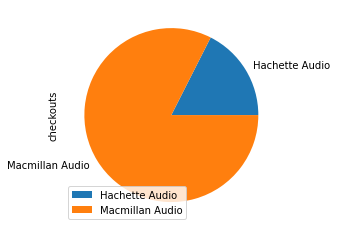

In [9]:
sum_df.plot.pie(x="publisher", y="checkouts")

<AxesSubplot:ylabel='checkouts'>

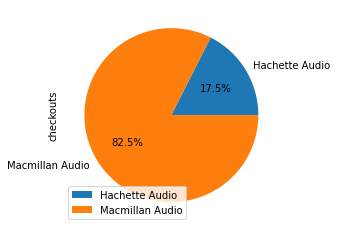

In [12]:
sum_df.plot.pie(x="publisher", y="checkouts", autopct="%1.1f%%")

<AxesSubplot:ylabel='publisher'>

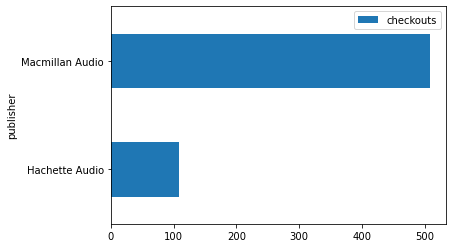

In [10]:
sum_df.plot.barh()